<a href="https://colab.research.google.com/github/LindsClar/Capstone-3/blob/main/Final_Forecasting_Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Coffee Sales

Coffee is my favorite drug, and as a mom, it's the drug I drink daily. I especially love my coffee when someone else makes it. Through these Coffee sales I will be cleaning and organizing the data to assist my favorite businesses.

Data: https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales/input

Table of contents
  - Import libraries
  - Import Data
  - Analyze data
  - Shaping the Data
    - Renaming and removing unneccessary data




In [84]:
#import all my libraries

import os
import numpy as np
import sklearn
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import time

from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.express as px
import plotly.graph_objects as go
import itertools

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
import xgboost
from sklearn.metrics import mean_squared_error
from math import sqrt

import math
import keras
import tensorflow as tf

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')
tf.random.set_seed(99)

Reading in the Data

In [2]:
#importing data
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')

Analyzing the DF.

In [3]:
df.head(20)

transaction_id transaction_date transaction_time  transaction_qty  \
0                1       2023-01-01         07:06:11                2   
1                2       2023-01-01         07:08:56                2   
2                3       2023-01-01         07:14:04                2   
3                4       2023-01-01         07:20:24                1   
4                5       2023-01-01         07:22:41                2   
5                6       2023-01-01         07:22:41                1   
6                7       2023-01-01         07:25:49                1   
7                8       2023-01-01         07:33:34                2   
8                9       2023-01-01         07:39:13                1   
9               10       2023-01-01         07:39:34                2   
10              11       2023-01-01         07:43:05                1   
11              12       2023-01-01         07:44:35                2   
12              13       2023-01-01         07:45:51                1   
13              14       2023-01-01         07:48:19                1   
14              15       2023-01-01         07:52:36                2   
15              16       2023-01-01         07:59:58                2   
16              17       2023-01-01         07:59:58                1   
17              18       2023-01-01         08:00:18                1   
18              19       2023-01-01         08:00:39                2   
19              20       2023-01-01         08:11:45                1   

    store_id   store_location  product_id  unit_price    product_category  \
0          5  Lower Manhattan          32        3.00              Coffee   
1          5  Lower Manhattan          57        3.10                 Tea   
2          5  Lower Manhattan          59        4.50  Drinking Chocolate   
3          5  Lower Manhattan          22        2.00              Coffee   
4          5  Lower Manhattan          57        3.10                 Tea   
5          5  Lower Manhattan          77        3.00              Bakery   
6          5  Lower Manhattan          22        2.00              Coffee   
7          5  Lower Manhattan          28        2.00              Coffee   
8          5  Lower Manhattan          39        4.25              Coffee   
9          5  Lower Manhattan          58        3.50  Drinking Chocolate   
10         5  Lower Manhattan          56        2.55                 Tea   
11         5  Lower Manhattan          33        3.50              Coffee   
12         5  Lower Manhattan          51        3.00                 Tea   
13         5  Lower Manhattan          57        3.10                 Tea   
14         5  Lower Manhattan          87        3.00              Coffee   
15         5  Lower Manhattan          47        3.00                 Tea   
16         5  Lower Manhattan          79        3.75              Bakery   
17         8   Hell's Kitchen          42        2.50                 Tea   
18         8   Hell's Kitchen          59        4.50  Drinking Chocolate   
19         8   Hell's Kitchen          61        4.75  Drinking Chocolate   

             product_type                product_detail  
0   Gourmet brewed coffee                   Ethiopia Rg  
1         Brewed Chai tea      Spicy Eye Opener Chai Lg  
2           Hot chocolate             Dark chocolate Lg  
3             Drip coffee   Our Old Time Diner Blend Sm  
4         Brewed Chai tea      Spicy Eye Opener Chai Lg  
5                   Scone                 Oatmeal Scone  
6             Drip coffee   Our Old Time Diner Blend Sm  
7   Gourmet brewed coffee     Columbian Medium Roast Sm  
8        Barista Espresso                      Latte Rg  
9           Hot chocolate             Dark chocolate Rg  
10        Brewed Chai tea      Spicy Eye Opener Chai Rg  
11  Gourmet brewed coffee                   Ethiopia Lg  
12       Brewed Black tea                  Earl Grey Lg  
13        Brewed Chai tea      Spicy Eye

Now that the Data a loaded, it's time to analyze the data to determine how we'll approach it. I see above that there a lot of columns that aren't necceary so I will be dropping them down below. This will streamline the data necceary.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.shape

(149116, 11)

In [6]:
df.isnull()

transaction_id  transaction_date  transaction_time  transaction_qty  \
0                False             False             False            False   
1                False             False             False            False   
2                False             False             False            False   
3                False             False             False            False   
4                False             False             False            False   
...                ...               ...               ...              ...   
149111           False             False             False            False   
149112           False             False             False            False   
149113           False             False             False            False   
149114           False             False             False            False   
149115           False             False             False            False   

        store_id  store_location  product_id  unit_price  product_category  \
0          False           False       False       False             False   
1          False           False       False       False             False   
2          False           False       False       False             False   
3          False           False       False       False             False   
4          False           False       False       False             False   
...          ...             ...         ...         ...               ...   
149111     False           False       False       False             False   
149112     False           False       False       False             False   
149113     False           False       False       False             False   
149114     False           False       False       False             False   
149115     False           False       False       False             False   

        product_type  product_detail  
0              False           False  
1              False           False  
2              False           False  
3              False           False  
4              False           False  
...              ...             ...  
149111         False           False  
149112         False           False  
149113         False           False  
149114         False           False  
149115         False           False  

[149116 rows x 11 columns]

# Transforming the Data
Looking through the data, there are a few changes I plan to make to better organize how the DataFrame is presented.

Based on how the data is currently structured, I’ve decided to take a different approach instead of melting or pivoting the data. I will narrow down the data first and then expand the columns that track the time periods and restaurants.

I’ll start by creating a column to track the time periods. Then, I will expand the store information to include separate columns for each restaurant. The goal is to clean the data thoroughly and reshape it so that it aligns with key metrics like the time of day (period), day of the week, and specific dates, making it easier to analyze.

In [7]:
df.rename(columns={'unit_price': 'Price','transaction_qty': 'Qty','transaction_date': 'Date', 'transaction_time': 'Time', 'store_location': 'Store','product_category': 'Product'}, inplace=True)

In [8]:
df.head()

transaction_id       Date      Time  Qty  store_id            Store  \
0               1 2023-01-01  07:06:11    2         5  Lower Manhattan   
1               2 2023-01-01  07:08:56    2         5  Lower Manhattan   
2               3 2023-01-01  07:14:04    2         5  Lower Manhattan   
3               4 2023-01-01  07:20:24    1         5  Lower Manhattan   
4               5 2023-01-01  07:22:41    2         5  Lower Manhattan   

   product_id  Price             Product           product_type  \
0          32    3.0              Coffee  Gourmet brewed coffee   
1          57    3.1                 Tea        Brewed Chai tea   
2          59    4.5  Drinking Chocolate          Hot chocolate   
3          22    2.0              Coffee            Drip coffee   
4          57    3.1                 Tea        Brewed Chai tea   

                product_detail  
0                  Ethiopia Rg  
1     Spicy Eye Opener Chai Lg  
2            Dark chocolate Lg  
3  Our Old Time Diner Blend Sm  
4     Spicy Eye Opener Chai Lg

In [9]:
#Product category and Product type are extremely similar
df = df.drop(columns=['product_type', 'transaction_id','store_id', 'product_id', 'product_detail'])
df.head(20)

Date      Time  Qty            Store  Price             Product
0  2023-01-01  07:06:11    2  Lower Manhattan   3.00              Coffee
1  2023-01-01  07:08:56    2  Lower Manhattan   3.10                 Tea
2  2023-01-01  07:14:04    2  Lower Manhattan   4.50  Drinking Chocolate
3  2023-01-01  07:20:24    1  Lower Manhattan   2.00              Coffee
4  2023-01-01  07:22:41    2  Lower Manhattan   3.10                 Tea
5  2023-01-01  07:22:41    1  Lower Manhattan   3.00              Bakery
6  2023-01-01  07:25:49    1  Lower Manhattan   2.00              Coffee
7  2023-01-01  07:33:34    2  Lower Manhattan   2.00              Coffee
8  2023-01-01  07:39:13    1  Lower Manhattan   4.25              Coffee
9  2023-01-01  07:39:34    2  Lower Manhattan   3.50  Drinking Chocolate
10 2023-01-01  07:43:05    1  Lower Manhattan   2.55                 Tea
11 2023-01-01  07:44:35    2  Lower Manhattan   3.50              Coffee
12 2023-01-01  07:45:51    1  Lower Manhattan   3.00                 Tea
13 2023-01-01  07:48:19    1  Lower Manhattan   3.10                 Tea
14 2023-01-01  07:52:36    2  Lower Manhattan   3.00              Coffee
15 2023-01-01  07:59:58    2  Lower Manhattan   3.00                 Tea
16 2023-01-01  07:59:58    1  Lower Manhattan   3.75              Bakery
17 2023-01-01  08:00:18    1   Hell's Kitchen   2.50                 Tea
18 2023-01-01  08:00:39    2   Hell's Kitchen   4.50  Drinking Chocolate
19 2023-01-01  08:11:45    1   Hell's Kitchen   4.75  Drinking Chocolate

 I don't like how the table has a lot more NaN, also should I use .melt? I was thinking of seperating

Note: the product category to create three or 4 smaller df by category
  Product Category
    - Coffee
    - Tea
    - Drinking coffee
    - Bakery

  While going throught the code, I went back and decided to classify by resturant and not focusing on coffee. I would like to see the sales of each Item and analyse what sells the most throughout the day

In [10]:
#locate duplicates
duplicates = df.duplicated()
df.loc[duplicates, :]

Date      Time  Qty            Store  Price Product
3256   2023-01-07  07:00:50    1  Lower Manhattan   3.75  Bakery
3438   2023-01-07  09:31:48    1   Hell's Kitchen   3.75  Bakery
3508   2023-01-07  10:29:12    1  Lower Manhattan   3.75  Bakery
3509   2023-01-07  10:29:12    1  Lower Manhattan   3.75  Bakery
3835   2023-01-08  07:30:17    1  Lower Manhattan   4.25  Coffee
...           ...       ...  ...              ...    ...     ...
148471 2023-06-30  09:49:35    1   Hell's Kitchen   3.75  Bakery
148610 2023-06-30  10:34:30    1  Lower Manhattan   3.75  Bakery
148701 2023-06-30  11:18:31    1   Hell's Kitchen   3.25  Bakery
148717 2023-06-30  11:24:35    1   Hell's Kitchen   3.75  Bakery
148718 2023-06-30  11:24:35    1   Hell's Kitchen   3.75  Bakery

[453 rows x 6 columns]

While price point, quantity, and product are all the same, which could indicate a duplicate, we need to consider the time of purchase. It appears that many of these products are purchased at different times, except for a few rows like 148718 and 148717. I will investigate this further as I clean the data and focus on a single store.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     149116 non-null  datetime64[ns]
 1   Time     149116 non-null  object        
 2   Qty      149116 non-null  int64         
 3   Store    149116 non-null  object        
 4   Price    149116 non-null  float64       
 5   Product  149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 6.8+ MB


In [12]:
#checking shape of DF
df.shape

(149116, 6)

Examing Unique values and missing values to drop

In [13]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [14]:
#new column to create a distinct period of time morning, day, night
df['Period'] = pd.cut(
    pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],  # Corrected labels
    right=False  # Use right=False to ensure that 24:00 falls into the last bin
)

In [15]:
#inspect
df.head(5)

Date      Time  Qty            Store  Price             Product  \
0 2023-01-01  07:06:11    2  Lower Manhattan    3.0              Coffee   
1 2023-01-01  07:08:56    2  Lower Manhattan    3.1                 Tea   
2 2023-01-01  07:14:04    2  Lower Manhattan    4.5  Drinking Chocolate   
3 2023-01-01  07:20:24    1  Lower Manhattan    2.0              Coffee   
4 2023-01-01  07:22:41    2  Lower Manhattan    3.1                 Tea   

    Period  
0  Morning  
1  Morning  
2  Morning  
3  Morning  
4  Morning

In [16]:
#ensuring format of time in the df
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [17]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [18]:
df.head(5)

Date      Time  Qty            Store  Price             Product  \
0 2023-01-01  07:06:11    2  Lower Manhattan    3.0              Coffee   
1 2023-01-01  07:08:56    2  Lower Manhattan    3.1                 Tea   
2 2023-01-01  07:14:04    2  Lower Manhattan    4.5  Drinking Chocolate   
3 2023-01-01  07:20:24    1  Lower Manhattan    2.0              Coffee   
4 2023-01-01  07:22:41    2  Lower Manhattan    3.1                 Tea   

    Period  
0  Morning  
1  Morning  
2  Morning  
3  Morning  
4  Morning

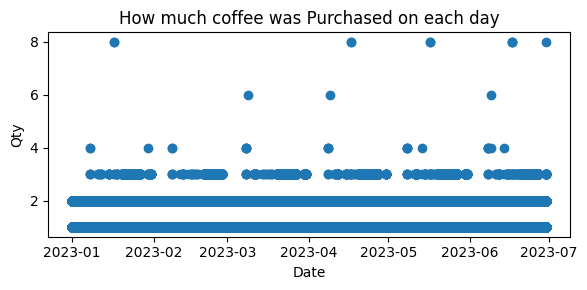

In [19]:
#now I can plot the date to product purchase
plt.figure(figsize=(6,3))
plt.scatter(df['Date'], df['Qty'])
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('How much coffee was Purchased on each day')
plt.tight_layout()
plt.show()

In [20]:
fig = px.line(df, x='Date', y='Qty', title='How much Product is normally was Purchased Over 7 Months')
fig.show()

With the plotting above I can see how purchase across the time line of 7 months is. We can also see how many coffee's customers purchase. I believe that there is different overlay between each resturant so I will be eliminating two of the three resturants so that we can inspect the variable of the items in one resturants.

In [21]:
df = df[df['Store']=="Astoria"]

In [22]:
df.head()
df.shape

(50599, 7)

In [23]:
duplicates_df = df.duplicated()
duplicates_df

105       False
106       False
107       False
111       False
113       False
          ...  
149103    False
149104    False
149105    False
149107    False
149108    False
Length: 50599, dtype: bool

Checking duplicates again in the df.

In [24]:
#the new column day_type
df['day_type'] = df['Date'].dt.day_name()

In [25]:
#filling the column with the type of week ie. weekend and weekday
df['day_type'] = df['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [26]:
#inspecting
df.head(5)

Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type  
105  Weekend  
106  Weekend  
107  Weekend  
111  Weekend  
113  Weekend

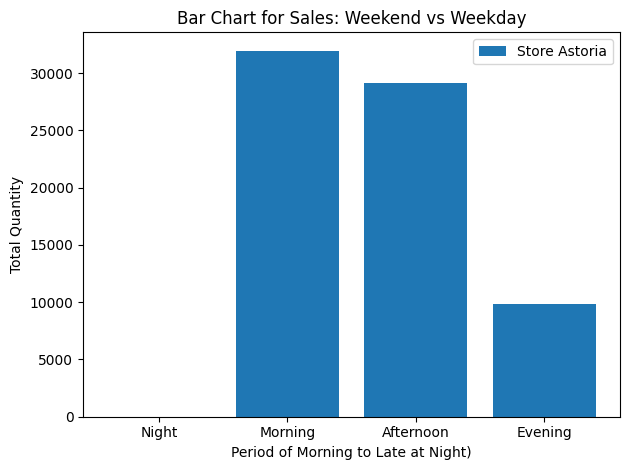

In [27]:
fig, ax = plt.subplots()

#"Period" * "Store" = "Qty"
grouped = df.groupby(["Period", "Store"])["Qty"].sum().reset_index()

#creating bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["Period"], store_data["Qty"], label=f"Store {store}")

#labelling
ax.set_xlabel("Period of Morning to Late at Night)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

#plot
plt.tight_layout()
plt.show()

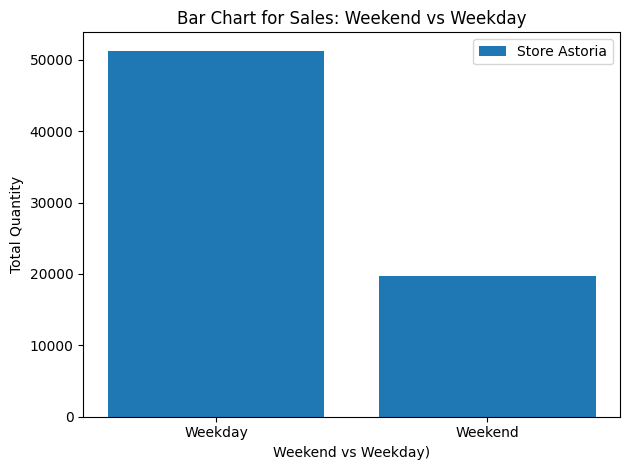

In [28]:
fig, ax = plt.subplots()

# Grouping by "Period" and "Store" to calculate total quantity
grouped = df.groupby(["day_type", "Store"])["Qty"].sum().reset_index()

# Creating the bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["day_type"], store_data["Qty"], label=f"Store {store}")

# Labelling
ax.set_xlabel("Weekend vs Weekday)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

With the bar chart above we can see the difference in sales in Astoria on the weekdays vs the weekends

In [29]:
df.head(5)

Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type  
105  Weekend  
106  Weekend  
107  Weekend  
111  Weekend  
113  Weekend

While looking through all my Data, I realized that I truly need to analyze each location for the sales. I see through this Data that I need to analyze each location to truly understand the sales per location.

In [30]:
df['datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str))

In [31]:
specific_date = '2023-01-01'
plot_data = df[df['Date'] == specific_date]

#Overview

In [32]:
duplicate_dates = df[df['Date'].duplicated()]
print(duplicate_dates)

             Date      Time  Qty    Store  Price             Product   Period  \
106    2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107    2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111    2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113    2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   
114    2023-01-01  11:10:21    1  Astoria   3.00                 Tea  Morning   
...           ...       ...  ...      ...    ...                 ...      ...   
149103 2023-06-30  19:51:59    2  Astoria   3.00              Coffee  Evening   
149104 2023-06-30  19:52:28    2  Astoria   2.45              Coffee  Evening   
149105 2023-06-30  19:53:46    1  Astoria   3.00              Coffee  Evening   
149107 2023-06-30  19:57:49    2  Astoria   2.50                 Tea  Evening   
149108 2023-06-30  19:57:49    1  Astoria   3.25              Bakery  Evening   

       day_type            

In [33]:
print(df.dtypes)

Date        datetime64[ns]
Time                object
Qty                  int64
Store               object
Price              float64
Product             object
Period            category
day_type            object
datetime    datetime64[ns]
dtype: object


Now that I've wrangled and shaped the data to my liking, I can begin the EDA process in the next phase of the capstone project. During the EDA process, I will explore the differences in sales based on the time of day and location. Specifically, I will analyze sales trends for different times of the day to identify patterns and variations. Furthermore, I will delve deeper into forecasting future sales and exploring potential improvements through modeling.

In [34]:
df['profits'] = df['Price'] * df['Qty']

In [35]:
Q1 = df['profits'].quantile(0.25)
Q3 = df['profits'].quantile(0.75)
IQR = Q3 - Q1

In [36]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
outliers = df[(df['profits'] < lower_bound) | (df['profits'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
              Date      Time  Qty    Store  Price       Product     Period  \
4067   2023-01-08  10:44:10    1  Astoria  14.75  Coffee beans    Morning   
4199   2023-01-08  14:02:53    1  Astoria  10.95     Loose Tea  Afternoon   
4299   2023-01-08  17:48:46    1  Astoria  18.00  Coffee beans  Afternoon   
4359   2023-01-08  19:54:56    1  Astoria  14.00       Branded    Evening   
4462   2023-01-09  07:59:55    1  Astoria  21.00  Coffee beans    Morning   
...           ...       ...  ...      ...    ...           ...        ...   
148248 2023-06-30  08:23:59    1  Astoria  14.00       Branded    Morning   
148659 2023-06-30  10:53:26    1  Astoria  10.95     Loose Tea    Morning   
148680 2023-06-30  10:58:22    1  Astoria  14.00       Branded    Morning   
148927 2023-06-30  15:59:13    1  Astoria  19.75  Coffee beans  Afternoon   
149064 2023-06-30  18:49:29    1  Astoria  14.75  Coffee beans    Evening   

       day_type            datetime  profits  
4067    Weekend 2

This is a really interesting demonstration of product sales and the transactions that produced the outliers. The products that likely remain in stock at Astoria without requiring significant effort from employees tend to represent the highest and lowest purchase amounts, which are identified as outliers. These dried products, such as coffee beans and loose tea, have a long shelf life, so they don’t significantly impact the workload of employees unless they are made in-house.
Revenue analysis shows that the outliers account for  16,307.86 𝑜𝑣𝑒𝑟 𝑎 7−𝑚𝑜𝑛𝑡ℎ 𝑝𝑒𝑟𝑖𝑜𝑑, 𝑐𝑜𝑚𝑝𝑎𝑟𝑒𝑑 𝑡𝑜 𝑡ℎ𝑒 𝑡𝑜𝑡𝑎𝑙 𝑝𝑟𝑜𝑓𝑖𝑡𝑠 𝑜𝑓 232,243.91. I’d like to narrow the impact of these outliers by removing those values to improve future forecasting and provide greater consistency in the dataset.

In [38]:
df = df.drop(outliers.index)

In [39]:
df.shape

(49774, 10)

With this we went from 149116 to 49,774 transactions

This is a really interesting demonstration of product sales and the transactions that produced the outliers. The products that are likely to remain in stock at Astoria with minimal effort from the shop tend to generate both the highest and lowest purchases. These dried products, like coffee beans and loose tea, have a long shelf life.

Now that I've wrangled and shaped the data to my liking, I can begin the EDA process in the next phase of the capstone project. During the EDA process, I will explore the differences in sales based on the time of day and location. Specifically, I will analyze sales trends for different times of the day to identify patterns and variations. Furthermore, I will delve deeper into forecasting future sales and exploring potential improvements through modeling.

#Exploring and Data Analysis

While wrangling the data i was able to evaluate that the sales from close up shows that there's consistent sales everyday. Now we want to truly explore the data of each variable.

In [40]:
print(df.columns)
df.head()

Index(['Date', 'Time', 'Qty', 'Store', 'Price', 'Product', 'Period',
       'day_type', 'datetime', 'profits'],
      dtype='object')


Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type            datetime  profits  
105  Weekend 2023-01-01 11:01:48     2.00  
106  Weekend 2023-01-01 11:01:58     3.75  
107  Weekend 2023-01-01 11:01:58     3.50  
111  Weekend 2023-01-01 11:08:11     4.50  
113  Weekend 2023-01-01 11:09:01     4.50

The graph above presents that the vas majority of sales over a 7 month period are from coffee and tea. Now lets take a look how sales shift in the evening

In [41]:
morning_df = df[df['Period']=='Morning']
evening_df = df[df['Period']=='Evening']

Now lets compare it to the evening sales for the last 7 months

In [42]:
#total revenue
Morning_profits = morning_df.groupby('Period')['profits'].sum().reset_index()
Evening_profits = evening_df.groupby('Period')['profits'].sum().reset_index()

print(Morning_profits)
print(Evening_profits)

      Period   profits
0      Night      0.00
1    Morning  95922.05
2  Afternoon      0.00
3    Evening      0.00
      Period  profits
0      Night      0.0
1    Morning      0.0
2  Afternoon      0.0
3    Evening  30240.1


I find the evening sales interesting because I would have expected a more dramatic shift toward customers purchasing either chocolate or tea during that time. However, 41% of sales being attributed to coffee still represents a significant portion of evening profits.

The difference in sales between the morning and evening is notable, as morning profits more than double those of the evening. This demonstrates that Astoria’s most consistent customers visit during the morning hours.

Let’s move forward and compare the profits to examine the differences between weekends and weekdays for Astoria.



In [43]:
Weekend_df = df[df['day_type']=='Weekend']
Weekday_df = df[df['day_type']=='Weekday']


#revenue sum
Weekday_df_profits = Weekday_df.groupby('day_type')['profits'].sum().reset_index()
Weekend_df_profits = Weekend_df.groupby('day_type')['profits'].sum().reset_index()

print(Weekday_df_profits)
print(Weekend_df_profits)

  day_type   profits
0  Weekday  156191.5
  day_type   profits
0  Weekend  59744.55


While looking at the information from Weekdays I see that there are consistant sales with coffee and tea, which makes sense because that's what Astoria is none for. Sales show consistent for the weekday.

Through careful analysis, I can see that the time periods with the lowest profits are evenings and weekends. Additionally, the products offered by Astoria that generate the lowest profits include branded items, loose tea, flavored products, and packaged chocolate.

It is also worth noting that shelf items, which may be displayed at the front of the coffee shop, tend to sell the least but have the highest outliers in terms of revenue. This insight suggests a potential low-effort opportunity to increase sales.

The analysis further shows that coffee and tea have consistent sales throughout the day but experience a significant boost in the morning.

Sales decline in the evening, which may present a hidden opportunity to host events such as tastings or to inspire customers to purchase more shelf items that yield higher revenue. These are small changes of the sales that need to be noted for future suggesttions and to make note of for possible suggestions for Astoria.

Other small changes to increase the consistent sales show over a 7 month period would be openning at 6am from 7am. This allows for customers that work early hours during the cold morning to have a a nice cup of Joe.

# **Forcasting/Modelling**

Now we'll be analyzing forcasting th data fame with a few different models
  - LSTMS in Keras - https://www.geeksforgeeks.org/multivariate-time-series-forecasting-with-lstms-in-keras/
  - XGBoost -
  - VAR - https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/?utm_source=chatgpt.com

Thru the forcasting I will be making a copy of the data to test it through each model

Forcasting / modeling multivariant time series considers patterns of multiple intersecting variables. This allows for different analysis of the future giving us a deeper dive of multiple variables. This is commonly seen in finaces and inventory/sales. The complexity increases with multivariants that considers a lot of factors that affects multiples variables over a period of time.



# Organizing the Dataframe for Forcasting/Modelling


Now we will prep the data for some Modelling of the Data.

In [44]:
#copy
copy = df.copy()
copy.head()

Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type            datetime  profits  
105  Weekend 2023-01-01 11:01:48     2.00  
106  Weekend 2023-01-01 11:01:58     3.75  
107  Weekend 2023-01-01 11:01:58     3.50  
111  Weekend 2023-01-01 11:08:11     4.50  
113  Weekend 2023-01-01 11:09:01     4.50

In [45]:
copy = copy.sort_values(by='datetime')
copy = copy.set_index('datetime')

In [46]:
#time to drop date and time
copy = copy.drop(columns=['Date', 'Time'])

In [47]:
missing_counts = copy.isnull().sum()
print(missing_counts)

Qty         0
Store       0
Price       0
Product     0
Period      0
day_type    0
profits     0
dtype: int64


In [48]:
copy['Qty'] = pd.to_numeric(copy['Qty'], errors='coerce')
#copy = copy.dropna(subset=['Quantity'])

In [49]:
copy.head()

Qty    Store  Price             Product   Period  \
datetime                                                                
2023-01-01 11:01:48    1  Astoria   2.00              Coffee  Morning   
2023-01-01 11:01:58    1  Astoria   3.75              Coffee  Morning   
2023-01-01 11:01:58    1  Astoria   3.50              Bakery  Morning   
2023-01-01 11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
2023-01-01 11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

                    day_type  profits  
datetime                               
2023-01-01 11:01:48  Weekend     2.00  
2023-01-01 11:01:58  Weekend     3.75  
2023-01-01 11:01:58  Weekend     3.50  
2023-01-01 11:08:11  Weekend     4.50  
2023-01-01 11:09:01  Weekend     4.50

In [50]:
copy.drop(columns=['Store'])

Qty  Price             Product   Period day_type  profits
datetime                                                                      
2023-01-01 11:01:48    1   2.00              Coffee  Morning  Weekend     2.00
2023-01-01 11:01:58    1   3.75              Coffee  Morning  Weekend     3.75
2023-01-01 11:01:58    1   3.50              Bakery  Morning  Weekend     3.50
2023-01-01 11:08:11    1   4.50  Drinking Chocolate  Morning  Weekend     4.50
2023-01-01 11:09:01    1   4.50  Drinking Chocolate  Morning  Weekend     4.50
...                  ...    ...                 ...      ...      ...      ...
2023-06-30 19:51:59    2   3.00              Coffee  Evening  Weekday     6.00
2023-06-30 19:52:28    2   2.45              Coffee  Evening  Weekday     4.90
2023-06-30 19:53:46    1   3.00              Coffee  Evening  Weekday     3.00
2023-06-30 19:57:49    2   2.50                 Tea  Evening  Weekday     5.00
2023-06-30 19:57:49    1   3.25              Bakery  Evening  Weekday     3.25

[49774 rows x 6 columns]

In [51]:
copy = pd.get_dummies(copy)
copy.head()

Qty  Price  profits  Store_Astoria  Product_Bakery  \
datetime                                                                  
2023-01-01 11:01:48    1   2.00     2.00           True           False   
2023-01-01 11:01:58    1   3.75     3.75           True           False   
2023-01-01 11:01:58    1   3.50     3.50           True            True   
2023-01-01 11:08:11    1   4.50     4.50           True           False   
2023-01-01 11:09:01    1   4.50     4.50           True           False   

                     Product_Coffee  Product_Coffee beans  \
datetime                                                    
2023-01-01 11:01:48            True                 False   
2023-01-01 11:01:58            True                 False   
2023-01-01 11:01:58           False                 False   
2023-01-01 11:08:11           False                 False   
2023-01-01 11:09:01           False                 False   

                     Product_Drinking Chocolate  Product_Flavours  \
datetime                                                            
2023-01-01 11:01:48                       False             False   
2023-01-01 11:01:58                       False             False   
2023-01-01 11:01:58                       False             False   
2023-01-01 11:08:11                        True             False   
2023-01-01 11:09:01                        True             False   

                     Product_Loose Tea  Product_Packaged Chocolate  \
datetime                                                             
2023-01-01 11:01:48              False                       False   
2023-01-01 11:01:58              False                       False   
2023-01-01 11:01:58              False                       False   
2023-01-01 11:08:11              False                       False   
2023-01-01 11:09:01              False                       False   

                     Product_Tea  Period_Night  Period_Morning  \
datetime                                                         
2023-01-01 11:01:48        False         False            True   
2023-01-01 11:01:58        False         False            True   
2023-01-01 11:01:58        False         False            True   
2023-01-01 11:08:11        False         False            True   
2023-01-01 11:09:01        False         False            True   

                     Period_Afternoon  Period_Evening  day_type_Weekday  \
datetime                                                                  
2023-01-01 11:01:48             False           False             False   
2023-01-01 11:01:58             False           False             False   
2023-01-01 11:01:58             False           False             False   
2023-01-01 11:08:11             False           False             False   
2023-01-01 11:09:01             False           False             False   

                     day_type_Weekend  
datetime                               
2023-01-01 11:01:48              True  
2023-01-01 11:01:58              True  
2023-01-01 11:01:58              True  
2023-01-01 11:08:11              True  
2023-01-01 11:09:01              True

In [52]:
copy.drop(columns=['profits'])

Qty  Price  Store_Astoria  Product_Bakery  \
datetime                                                         
2023-01-01 11:01:48    1   2.00           True           False   
2023-01-01 11:01:58    1   3.75           True           False   
2023-01-01 11:01:58    1   3.50           True            True   
2023-01-01 11:08:11    1   4.50           True           False   
2023-01-01 11:09:01    1   4.50           True           False   
...                  ...    ...            ...             ...   
2023-06-30 19:51:59    2   3.00           True           False   
2023-06-30 19:52:28    2   2.45           True           False   
2023-06-30 19:53:46    1   3.00           True           False   
2023-06-30 19:57:49    2   2.50           True           False   
2023-06-30 19:57:49    1   3.25           True            True   

                     Product_Coffee  Product_Coffee beans  \
datetime                                                    
2023-01-01 11:01:48            True                 False   
2023-01-01 11:01:58            True                 False   
2023-01-01 11:01:58           False                 False   
2023-01-01 11:08:11           False                 False   
2023-01-01 11:09:01           False                 False   
...                             ...                   ...   
2023-06-30 19:51:59            True                 False   
2023-06-30 19:52:28            True                 False   
2023-06-30 19:53:46            True                 False   
2023-06-30 19:57:49           False                 False   
2023-06-30 19:57:49           False                 False   

                     Product_Drinking Chocolate  Product_Flavours  \
datetime                                                            
2023-01-01 11:01:48                       False             False   
2023-01-01 11:01:58                       False             False   
2023-01-01 11:01:58                       False             False   
2023-01-01 11:08:11                        True             False   
2023-01-01 11:09:01                        True             False   
...                                         ...               ...   
2023-06-30 19:51:59                       False             False   
2023-06-30 19:52:28                       False             False   
2023-06-30 19:53:46                       False             False   
2023-06-30 19:57:49                       False             False   
2023-06-30 19:57:49                       False             False   

                     Product_Loose Tea  Product_Packaged Chocolate  \
datetime                                                             
2023-01-01 11:01:48              False                       False   
2023-01-01 11:01:58              False                       False   
2023-01-01 11:01:58              False                       False   
2023-01-01 11:08:11              False                       False   
2023-01-01 11:09:01              False                       False   
...                                ...                         ...   
2023-06-30 19:51:59              False                       False   
2023-06-30 19:52:28              False                       False   
2023-06-30 19:53:46              False                       False   
2023-06-30 19:57:49              False                       False   
2023-06-30 19:57:49              False                       False   

                     Product_Tea  Period_Night  Period_Morning  \
datetime                                                         
2023-01-01 11:01:48        False         False            True   
2023-01-01 11:01:58        False         False            True   
2023-01-01 11:01:58        False         False            True   
2023-01-01 11:08:11        False         False            True   
2023-01-01 11:09:01        False         False            True   
...                          ...           ...             ...   
2023-06-30 19:51:59        Fals

In [53]:
X = copy.drop(columns=['Qty'])
y = copy['Qty']

Train and Test Split

# LSTM

Long Term Short Term Memeory

How to approach the Modelling process?
- prepping data by combinning features and target values in a single df or array
- normalize the data by either scaling or Standardization
- Train - Test split (Note: This is not to be randomized due to it being a time series)
- Needs a 3D input [sample, time_steps, features]
- build the model with keras or TensorFlows
- Evaluate and predict

In [54]:

def create_sequences(x, y, seq_length):
    """
    Creates sequences from input data for an LSTM.

    Args:
      x: Input data (features) as a NumPy array.
      y: Target data (labels) as a NumPy array.
      seq_length: The length of each sequence.

    Returns:
      X: A NumPy array containing the input sequences.
      y: A NumPy array containing the corresponding target values.
    """

    X, Y = [], []
    for i in range(len(x) - seq_length):
        X.append(x[i:(i + seq_length)])
        Y.append(y[i + seq_length])
    return np.array(X), np.array(Y)


seq_length = 10
new_x, new_y = create_sequences(X, y, seq_length)

print("X shape:", new_x.shape)
print("Y shape:", new_y.shape)

X shape: (49744, 30, 17)
Y shape: (49744,)


In [55]:
train_size = int(len(X) * 0.8)
X_train, X_test = new_x[0:train_size], new_x[train_size:]
Y_train, Y_test = new_y[0:train_size], new_y[train_size:]

In [56]:
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)

X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [57]:
print(X_train.shape)
print(X_train.dtype)
print()
print(Y_train.shape)
print(Y_train.dtype)

(39819, 30, 17)
float32

(39819,)
float32


In [58]:
print(X_test.shape)
print(X_test.dtype)
print()
print(Y_test.shape)
print(Y_test.dtype)

(9925, 30, 17)
float32

(9925,)
float32


In [59]:
def train_model(units):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
    return model

In [62]:
units_list = [12, 24, 38]
#units_list = [32, 64,128] #may adjust this for time

In [63]:
best_params = None
best_rmse = float('inf')
best_model = None

#Iterate through hyperparameter combinations
for units in units_list:
    print(f"Training with units={units}")
    model = train_model(units)

    #predict on test data
    y_pred = model.predict(X_test)

    #model performance
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    print(f"RMSE: {rmse}")

    # Update best model
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'units': units}
        best_model = model

#printing best model
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

#best model
y_pred_best = best_model.predict(X_test)


Training with units=12
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
RMSE: 0.4854950414535987
Training with units=24
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
RMSE: 0.4863182128141236
Training with units=38
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
RMSE: 0.48947199779758616
Best Hyperparameters: {'units': 12}
Best RMSE: 0.4854950414535987
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
y_pred_best

array([[1.4257134],
       [1.4086589],
       [1.4625691],
       ...,
       [1.2975875],
       [1.3122387],
       [1.3891009]], dtype=float32)

Now to graph the results

In [66]:
if Y_test.ndim == 1:
  Y_test = Y_test.reshape(-1, 1)
print("New Y_test shape:", Y_test.shape)

New Y_test shape: (9925, 1)


In [67]:
results_lstm = {
    'Predicted': y_pred_best[:, 0],
    'Actual': Y_test[:, 0]
}

results_lstm = pd.DataFrame(results_lstm)

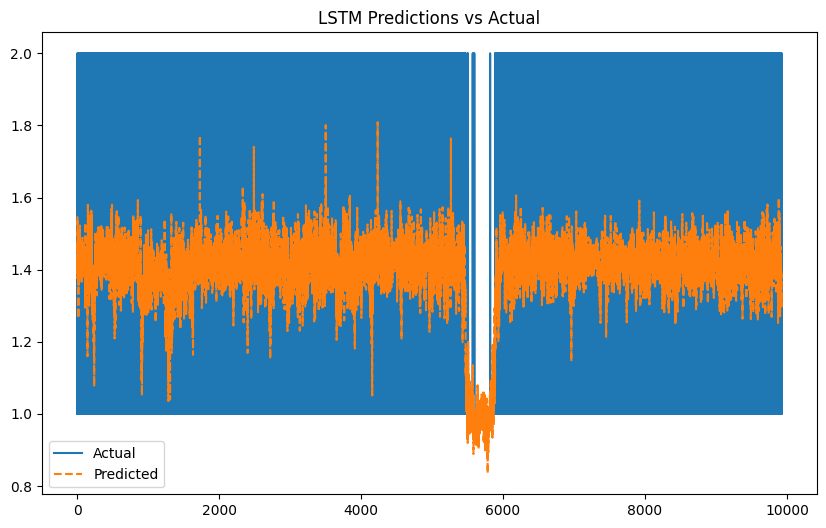

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(results_lstm['Actual'], label='Actual')
ax.plot(results_lstm['Predicted'], label='Predicted', linestyle='--')
ax.legend()
ax.set_title('LSTM Predictions vs Actual')
plt.show()

# GRU

This is a Gated Recurrent Unit uses sequential data like LSTM shown above. This system uses gates to determine how much data from the past is needed for the future. GRU has a similar proformance as LSTM but is a simpler process. This means it has a faster train process even though it is similar.

In [71]:
multivariate_gru = Sequential()
multivariate_gru.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
multivariate_gru.add(Dropout(0.2))
multivariate_gru.add(GRU(64))
multivariate_gru.add(Dropout(0.2))
multivariate_gru.add(Dense(1))

In [72]:
multivariate_gru.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
history = multivariate_gru.fit(X_train, Y_train, epochs=10) #adjusted epoch from 20 to 10

Epoch 1/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - loss: 0.3116
Epoch 2/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - loss: 0.2522
Epoch 3/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 90s 54ms/step - loss: 0.2466
Epoch 4/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - loss: 0.2460
Epoch 5/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - loss: 0.2449
Epoch 6/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - loss: 0.2438
Epoch 7/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - loss: 0.2427
Epoch 8/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - loss: 0.2421
Epoch 9/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - loss: 0.2414
Epoch 10/10
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - loss: 0.2414


In [74]:
#forecast
predicted_values = multivariate_gru.predict(X_test)

Y_test = Y_test.reshape(-1, 1)
#checking new shape
print("New Y_test shape:", Y_test.shape)

results = {
    'Predicted': predicted_values[:, 0],
    'Actual': Y_test[:, 0],
    }

results = pd.DataFrame(results)

311/311 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
New Y_test shape: (9925, 1)


In [75]:
mse_gru = sklearn.metrics.mean_squared_error(results['Actual'].to_numpy(), results['Predicted'].to_numpy())

In [76]:
print(f"MSE: {mse_gru}")

MSE: 0.23518945276737213


In [77]:
rmse_gru = np.sqrt(mse_gru)
print("GRU Model - Root Mean Square Error (RMSE): %.3f" % rmse_gru)

GRU Model - Root Mean Square Error (RMSE): 0.485


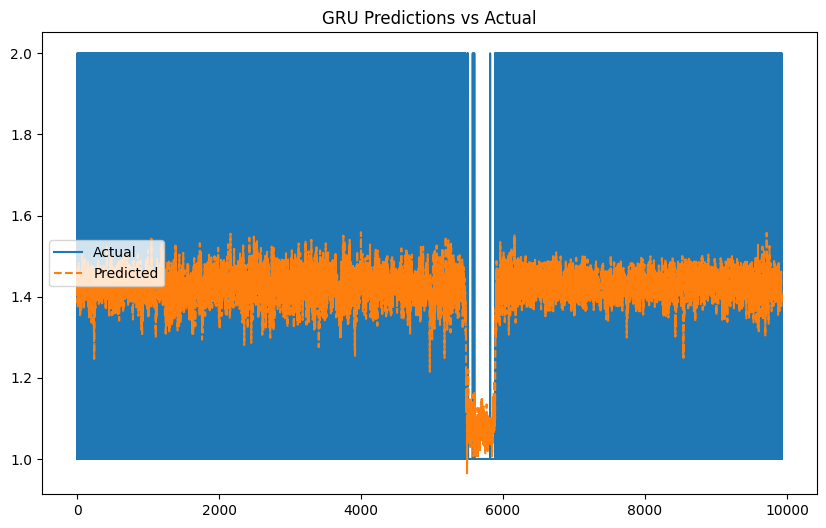

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(results['Actual'], label='Actual')
ax.plot(results['Predicted'], label='Predicted', linestyle='--')
ax.legend()
ax.set_title('GRU Predictions vs Actual')
plt.show()


# XGBoost


This is gradient-boosted decision tree that is scaleable. It's an ensemble learning algorithim for classification and regression.

This includes bagging, boosting and gradient boosting ensemble technique.

- Ensemble learning uses two or more learners.
- Bagging uses a technique called bootstrap resampling to derive multiple new datasets from one initial training dataset in order to train multiple base learners.
- Boosting combines multiple weaker classifers to create a stonger classifer.


X_train_scaled shape: (8299, 17)
y_train_1d shape: (8299,)
XGBoost - Root Mean Square Error (RMSE): 0.000


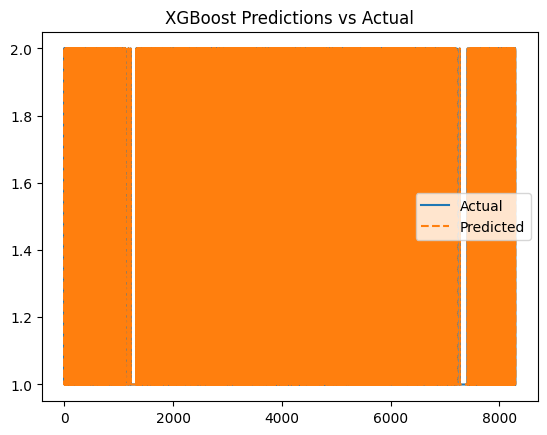

X_train_scaled shape: (16594, 17)
y_train_1d shape: (16594,)
XGBoost - Root Mean Square Error (RMSE): 0.000


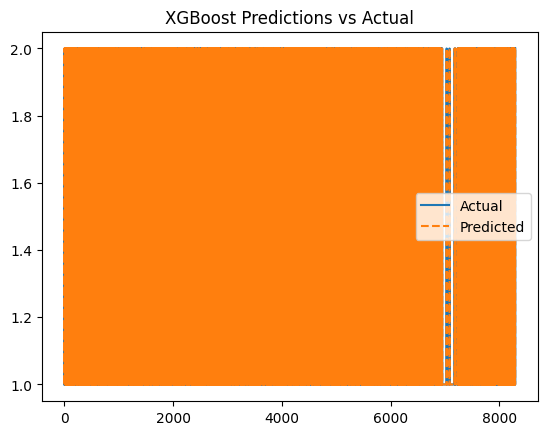

X_train_scaled shape: (24889, 17)
y_train_1d shape: (24889,)
XGBoost - Root Mean Square Error (RMSE): 0.000


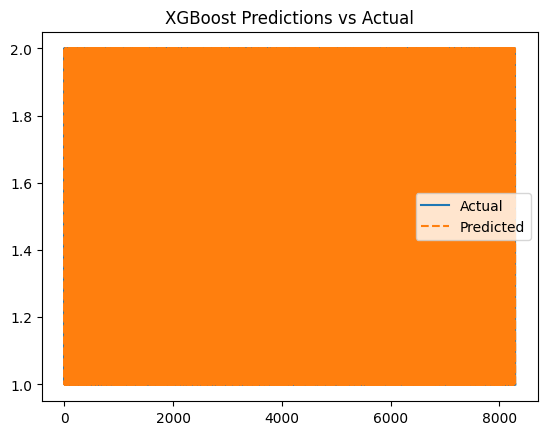

X_train_scaled shape: (33184, 17)
y_train_1d shape: (33184,)
XGBoost - Root Mean Square Error (RMSE): 0.000


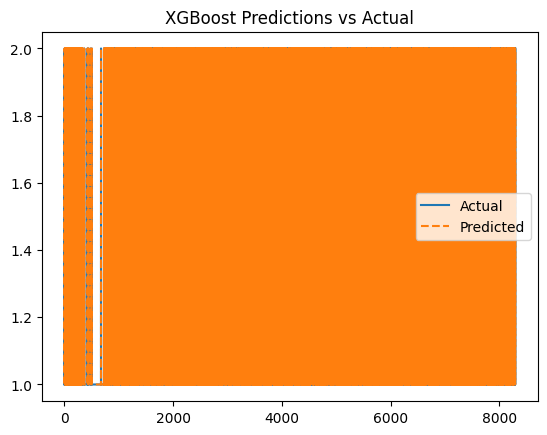

X_train_scaled shape: (41479, 17)
y_train_1d shape: (41479,)
XGBoost - Root Mean Square Error (RMSE): 0.000


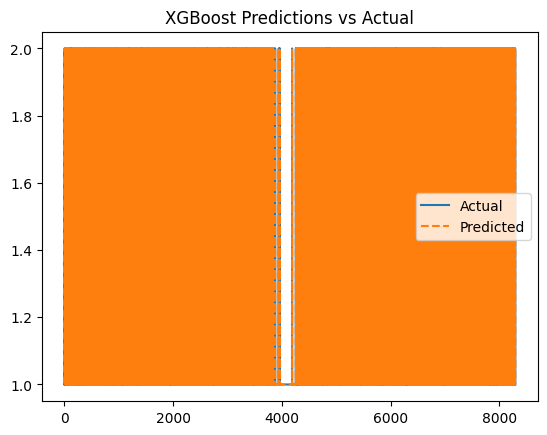

In [81]:
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    # Split data into training and testing sets
    X_train_2d, X_test_2d = X.iloc[train_index], X.iloc[test_index]
    y_train_2d, y_test_2d = y.iloc[train_index], y.iloc[test_index]

    # Ensure y is reshaped as a 1D array
    y_train_1d = y_train_2d.values.ravel()
    y_test_1d = y_test_2d.values.ravel()

    # Scale inputs
    scalerX = StandardScaler()
    X_train_scaled = scalerX.fit_transform(X_train_2d)
    X_test_scaled = scalerX.transform(X_test_2d)

    print("X_train_scaled shape:", X_train_scaled.shape)
    print("y_train_1d shape:", y_train_1d.shape)

    # Train the XGBoost model
    reg = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000, nthread=24)
    reg.fit(X_train_scaled, y_train_1d)

    # Predict the test data
    predictions_xgb = reg.predict(X_test_scaled)

    # Calculate RMSE
    rmse_xgb = sqrt(mean_squared_error(y_test_1d, predictions_xgb))
    print("XGBoost - Root Mean Square Error (RMSE): %.3f" % rmse_xgb)

    # Visualize predictions vs. actual
    import matplotlib.pyplot as plt
    plt.plot(y_test_1d, label='Actual')
    plt.plot(predictions_xgb, label='Predicted', linestyle='--')
    plt.legend()
    plt.title('XGBoost Predictions vs Actual')
    plt.show()

# VAR

VAR: multivariate extension of autoregression (AR) models

VAR will considers multiple variables compared to AR models. While Modelling with VAR there are a few parameters to follow.
  - Keeping the time series stationary
  - lag selection and this depends on the data
  - Indices of forcast match test set and this allows for proper validation
  - MSE allows us to compare the predictive values

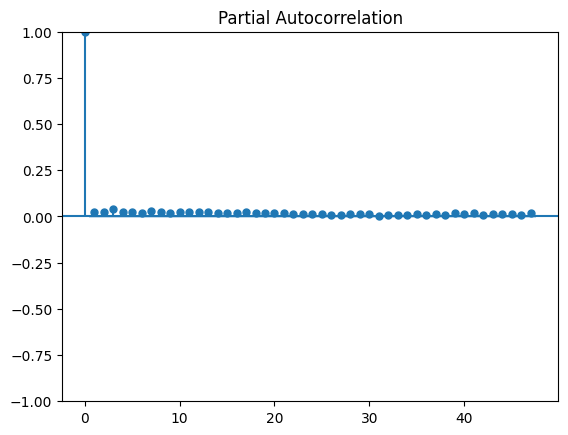

In [82]:
plot_pacf(copy['Qty'])
plt.show()

While looking through this Partial Autocorrelation graph, there are no values in the negative, which doesn't help with deciding the maxlag variable in VAR. This variable is needed in the modeling process.

#Overview of Modelling with each system

There are various ways to forcast or model predictive values to see the enviorment of possible variables in the future. In this multivariant time series, we will inspect coffee shops sales in New York. Through this modelling process we used various models such as: LSTM, GRU, XGBoost and VAR.

- LSTM : Handles issues of a tradional rnn has from passing thorugh time. It allows to be introduced as a memory cell that holds the information for a extended period of time. This architectue allows it to do long term dependencies in sequential data, which is helpful for time series forcasting,
- GRU : System uses gates to determine how much data from the past is needed for the future. GRU has a similar proformance as LSTM but is a simpler process
- XGBoost : Includes bagging, boosting and gradient boosting ensemble technique
- VAR : is a statistial model that describes how multiple variables change over. Normalling we can see the catured relationship between multiple variables but this couldn't be demonstrated in this data.



In [83]:
#Comparing all models

print("LSTM Root Mean Squared Error: ", best_rmse)
print("GRU Root Mean Squared Error: ", rmse_gru)
print("XGBoost Root Mean Squared Error: ", rmse_xgb)


LSTM Root Mean Squared Error:  0.4854950414535987
GRU Root Mean Squared Error:  0.4849633519838093
XGBoost Root Mean Squared Error:  1.0946075704543654e-05


This indicates that XGBoost is proforming the best modelling the data.

